In [5]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from encodings.aliases import aliases # Python has a file containing a dictionary of encoding names and associated aliases
#the matplotlib plots will appear directly below the cell in which the plot function was called.
%matplotlib inline

In [ ]:
# To find encodings that work

# Below line creates a set of all available encodingsalias_values = set(aliases.values())

for encoding in set(aliases.values()):
    try:
        df=pd.read_csv("crime.csv", nrows=10, encoding=encoding) # read in only 10 lines for faster read
        print('successful', encoding)
    except:
        pass

In [13]:
crime = pd.read_csv("crime.csv", encoding="cp863")

In [ ]:
crime.head()

In [21]:
#checking the shape of the dataframe
crime.shape

(319073, 17)

In [23]:
#counting the number of duplicate rows
crime.duplicated().sum()

23

In [27]:
#dropping the duplicated rows
crime.drop_duplicates(inplace=True)

In [29]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319050 non-null  object 
 1   OFFENSE_CODE         319050 non-null  int64  
 2   OFFENSE_CODE_GROUP   319050 non-null  object 
 3   OFFENSE_DESCRIPTION  319050 non-null  object 
 4   DISTRICT             317285 non-null  object 
 5   REPORTING_AREA       319050 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319050 non-null  object 
 8   YEAR                 319050 non-null  int64  
 9   MONTH                319050 non-null  int64  
 10  DAY_OF_WEEK          319050 non-null  object 
 11  HOUR                 319050 non-null  int64  
 12  UCR_PART             318960 non-null  object 
 13  STREET               308179 non-null  object 
 14  Lat                  299052 non-null  float64
 15  Long                 2

In [31]:
#Changing the data type from object to datetime for the OCCURRED_ON_DATE column
crime.OCCURRED_ON_DATE = pd.to_datetime(crime.OCCURRED_ON_DATE)

In [ ]:
#summart on information for the numeric columns
crime.describe()

In [ ]:
#summary for non-numeric columns
crime.describe(include='object')

In [ ]:
#checking for the number of unqiue values 
for col in crime.columns:
    unique_count = crime[col].nunique()
    print(col + " has " + str(unique_count) + " unique values")

In [ ]:
#what are the most common crimes in terms of offense group? 
crime.OFFENSE_CODE_GROUP.value_counts()

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    0.116383
Larceny                            0.081288
Medical Assistance                 0.073782
Investigate Person                 0.058765
Other                              0.056646
Drug Violation                     0.051857
Simple Assault                     0.049604
Vandalism                          0.048312
Verbal Disputes                    0.041056
Towed                              0.035377
Name: count, dtype: float64

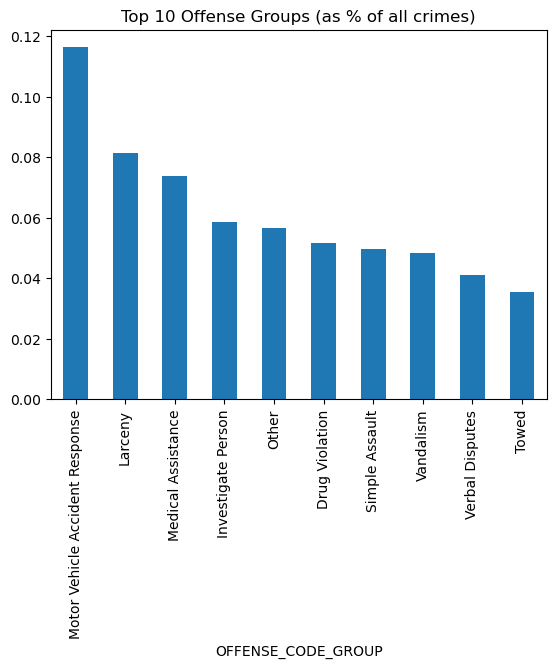

In [54]:
offense_group_vals = crime.OFFENSE_CODE_GROUP.value_counts()[:10]

display(offense_group_vals/crime.shape[0])

#creating a bar chart of the top 10 offense groups
(offense_group_vals/crime.shape[0]).plot(kind='bar');
plt.title('Top 10 Offense Groups (as % of all crimes)');

In [56]:
#What are the least common offense groups?
crime.OFFENSE_CODE_GROUP.value_counts().sort_values(ascending=True)[:10]

OFFENSE_CODE_GROUP
Burglary - No Property Taken                  2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE     2
Biological Threat                             2
INVESTIGATE PERSON                            4
HUMAN TRAFFICKING                             7
Gambling                                      8
Manslaughter                                  8
Explosives                                   27
Phone Call Complaints                        31
Aircraft                                     36
Name: count, dtype: int64

In [ ]:
#What are the most common offense descriptions?
crime.OFFENSE_DESCRIPTION.value_counts()

OFFENSE_DESCRIPTION
SICK/INJURED/MEDICAL - PERSON            0.058872
INVESTIGATE PERSON                       0.058778
M/V - LEAVING SCENE - PROPERTY DAMAGE    0.051161
VANDALISM                                0.047494
ASSAULT SIMPLE - BATTERY                 0.046360
VERBAL DISPUTE                           0.041056
TOWED MOTOR VEHICLE                      0.035377
INVESTIGATE PROPERTY                     0.034866
LARCENY THEFT FROM BUILDING              0.028425
THREATS TO DO BODILY HARM                0.028340
Name: count, dtype: float64

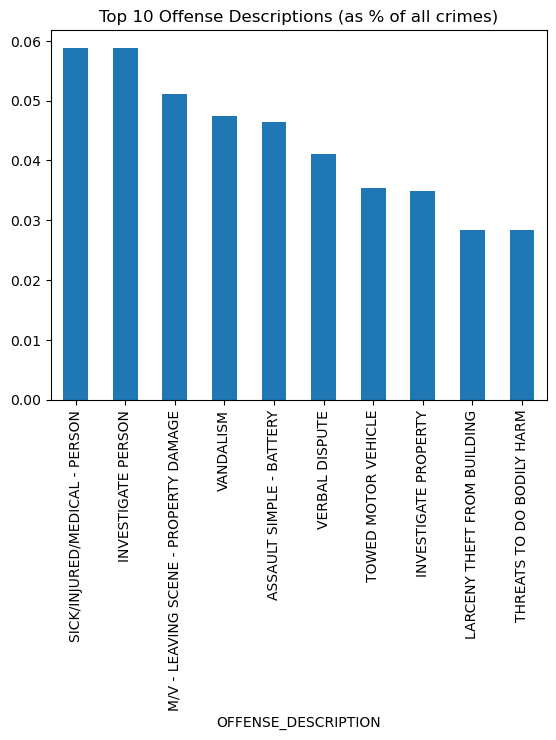

In [62]:
offense_description_vals = crime.OFFENSE_DESCRIPTION.value_counts()[:10]

display(offense_description_vals / crime.shape[0])
(offense_description_vals / crime.shape[0]).plot(kind='bar');
plt.title('Top 10 Offense Descriptions (as % of all crimes)');

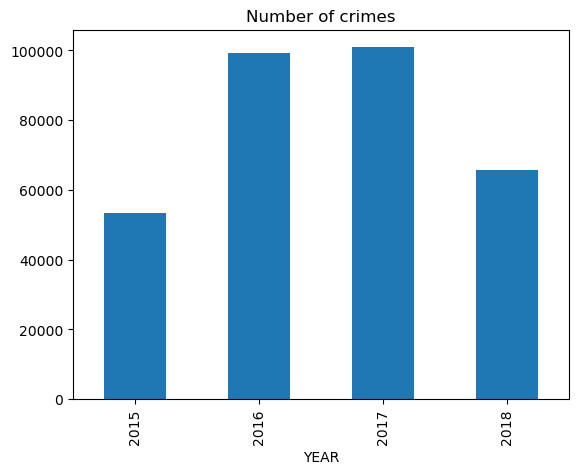

In [66]:
# In which year were the most crimes committed?
crime.groupby('YEAR').count()['INCIDENT_NUMBER'].plot(kind='bar');
plt.title('Number of crimes');